In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

In [3]:

import pandas as pd
from sklearn.preprocessing import MinMaxScaler


from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [5]:
data = pd.read_csv("Employee.csv")

In [7]:
df = pd.DataFrame(data)

In [9]:
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [11]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [13]:
df.duplicated().sum()

1889

In [15]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [19]:
df = df.drop_duplicates()


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2764 entries, 0 to 4651
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  2764 non-null   object
 1   JoiningYear                2764 non-null   int64 
 2   City                       2764 non-null   object
 3   PaymentTier                2764 non-null   int64 
 4   Age                        2764 non-null   int64 
 5   Gender                     2764 non-null   object
 6   EverBenched                2764 non-null   object
 7   ExperienceInCurrentDomain  2764 non-null   int64 
 8   LeaveOrNot                 2764 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 215.9+ KB


In [23]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000
mean,2015.090449,2.636035,30.952967,2.644356,0.393632
std,1.885943,0.624001,5.108872,1.610610,0.488643
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,2.000000,27.000000,1.000000,0.000000
50%,2015.000000,3.000000,30.000000,2.000000,0.000000
75%,2017.000000,3.000000,35.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [27]:
df.duplicated().sum()

0

In [29]:
df['Gender'].sample(50)

3071      Male
80        Male
77      Female
631       Male
3192      Male
3320    Female
4439    Female
3602      Male
73        Male
4375      Male
2993    Female
3283    Female
2465      Male
234     Female
4329    Female
1475      Male
267       Male
4432    Female
4281    Female
685     Female
3285    Female
4060    Female
4449      Male
178     Female
4458    Female
3712    Female
253       Male
2492    Female
3351      Male
3140    Female
1069    Female
2685    Female
2772      Male
355     Female
3232    Female
3645      Male
4080    Female
359     Female
2490      Male
3644    Female
1912    Female
2514      Male
2253      Male
2213      Male
4074    Female
293     Female
2073    Female
2665      Male
3405      Male
2687      Male
Name: Gender, dtype: object

In [33]:
# One-Hot Encoding 'Genre' column
df = pd.get_dummies(df, columns=['Gender'])
print("\nDataset After One-Hot Encoding 'Gender':")
df


Dataset After One-Hot Encoding 'Gender':


,Education,JoiningYear,City,PaymentTier,Age,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Gender_Female,Gender_Male
0,Bachelors,2017,Bangalore,3,34,No,0,0,False,True
1,Bachelors,2013,Pune,1,28,No,3,1,True,False
2,Bachelors,2014,New Delhi,3,38,No,2,0,True,False
3,Masters,2016,Bangalore,3,27,No,5,1,False,True
4,Masters,2017,Pune,3,24,Yes,2,1,False,True
...,...,...,...,...,...,...,...,...,...,...
4645,Masters,2017,Pune,2,31,No,2,0,True,False
4647,Bachelors,2016,Pune,3,30,No,2,0,False,True
4649,Masters,2013,Pune,2,37,No,2,1,False,True
4650,Masters,2018,New Delhi,3,27,No,5,1,False,True


In [35]:
df

,Education,JoiningYear,City,PaymentTier,Age,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Gender_Female,Gender_Male
0,Bachelors,2017,Bangalore,3,34,No,0,0,False,True
1,Bachelors,2013,Pune,1,28,No,3,1,True,False
2,Bachelors,2014,New Delhi,3,38,No,2,0,True,False
3,Masters,2016,Bangalore,3,27,No,5,1,False,True
4,Masters,2017,Pune,3,24,Yes,2,1,False,True
...,...,...,...,...,...,...,...,...,...,...
4645,Masters,2017,Pune,2,31,No,2,0,True,False
4647,Bachelors,2016,Pune,3,30,No,2,0,False,True
4649,Masters,2013,Pune,2,37,No,2,1,False,True
4650,Masters,2018,New Delhi,3,27,No,5,1,False,True


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2764 entries, 0 to 4651
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  2764 non-null   object
 1   JoiningYear                2764 non-null   int64 
 2   City                       2764 non-null   object
 3   PaymentTier                2764 non-null   int64 
 4   Age                        2764 non-null   int64 
 5   EverBenched                2764 non-null   object
 6   ExperienceInCurrentDomain  2764 non-null   int64 
 7   LeaveOrNot                 2764 non-null   int64 
 8   Gender_Female              2764 non-null   bool  
 9   Gender_Male                2764 non-null   bool  
dtypes: bool(2), int64(5), object(3)
memory usage: 199.7+ KB


In [47]:

df['Gender_Female'] = df['Gender_Female'].replace({'True': 1, 'False': 0}).astype(int)
df['Gender_Male'] = df['Gender_Male'].replace({'True': 1, 'False': 0}).astype(int)


In [51]:
df

,Education,JoiningYear,City,PaymentTier,Age,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Gender_Female,Gender_Male
0,Bachelors,2017,Bangalore,3,34,No,0,0,0,1
1,Bachelors,2013,Pune,1,28,No,3,1,1,0
2,Bachelors,2014,New Delhi,3,38,No,2,0,1,0
3,Masters,2016,Bangalore,3,27,No,5,1,0,1
4,Masters,2017,Pune,3,24,Yes,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...
4645,Masters,2017,Pune,2,31,No,2,0,1,0
4647,Bachelors,2016,Pune,3,30,No,2,0,0,1
4649,Masters,2013,Pune,2,37,No,2,1,0,1
4650,Masters,2018,New Delhi,3,27,No,5,1,0,1


In [53]:
# One-Hot Encoding 'Genre' column
df = pd.get_dummies(df, columns=['EverBenched'])
print("\nDataset After One-Hot Encoding 'EverBenched':")
df


Dataset After One-Hot Encoding 'EverBenched':


,Education,JoiningYear,City,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Gender_Female,Gender_Male,EverBenched_No,EverBenched_Yes
0,Bachelors,2017,Bangalore,3,34,0,0,0,1,True,False
1,Bachelors,2013,Pune,1,28,3,1,1,0,True,False
2,Bachelors,2014,New Delhi,3,38,2,0,1,0,True,False
3,Masters,2016,Bangalore,3,27,5,1,0,1,True,False
4,Masters,2017,Pune,3,24,2,1,0,1,False,True
...,...,...,...,...,...,...,...,...,...,...,...
4645,Masters,2017,Pune,2,31,2,0,1,0,True,False
4647,Bachelors,2016,Pune,3,30,2,0,0,1,True,False
4649,Masters,2013,Pune,2,37,2,1,0,1,True,False
4650,Masters,2018,New Delhi,3,27,5,1,0,1,True,False


In [55]:

df['EverBenched_No'] = df['EverBenched_No'].replace({'True': 1, 'False': 0}).astype(int)
df['EverBenched_Yes'] = df['EverBenched_Yes'].replace({'True': 1, 'False': 0}).astype(int)


In [57]:
df

,Education,JoiningYear,City,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Gender_Female,Gender_Male,EverBenched_No,EverBenched_Yes
0,Bachelors,2017,Bangalore,3,34,0,0,0,1,1,0
1,Bachelors,2013,Pune,1,28,3,1,1,0,1,0
2,Bachelors,2014,New Delhi,3,38,2,0,1,0,1,0
3,Masters,2016,Bangalore,3,27,5,1,0,1,1,0
4,Masters,2017,Pune,3,24,2,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4645,Masters,2017,Pune,2,31,2,0,1,0,1,0
4647,Bachelors,2016,Pune,3,30,2,0,0,1,1,0
4649,Masters,2013,Pune,2,37,2,1,0,1,1,0
4650,Masters,2018,New Delhi,3,27,5,1,0,1,1,0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2764 entries, 0 to 4651
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  2764 non-null   object
 1   JoiningYear                2764 non-null   int64 
 2   City                       2764 non-null   object
 3   PaymentTier                2764 non-null   int64 
 4   Age                        2764 non-null   int64 
 5   ExperienceInCurrentDomain  2764 non-null   int64 
 6   LeaveOrNot                 2764 non-null   int64 
 7   Gender_Female              2764 non-null   int32 
 8   Gender_Male                2764 non-null   int32 
 9   EverBenched_No             2764 non-null   int32 
 10  EverBenched_Yes            2764 non-null   int32 
dtypes: int32(4), int64(5), object(2)
memory usage: 215.9+ KB


In [65]:
# Label Encoding 'City' column
label_encoder = LabelEncoder()
df['City_LabelEncoded'] = label_encoder.fit_transform(df['City'])
print("\nDataset After Label Encoding 'City':")
df[['City', 'City_LabelEncoded']]



Dataset After Label Encoding 'City':


,City,City_LabelEncoded
0,Bangalore,0
1,Pune,2
2,New Delhi,1
3,Bangalore,0
4,Pune,2
...,...,...
4645,Pune,2
4647,Pune,2
4649,Pune,2
4650,New Delhi,1


In [67]:
df.sample(50)

,Education,JoiningYear,City,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Gender_Female,Gender_Male,EverBenched_No,EverBenched_Yes,City_LabelEncoded
350,Bachelors,2015,Pune,3,26,4,1,1,0,1,0,2
3115,Masters,2015,Pune,2,34,1,0,1,0,1,0,2
4208,Bachelors,2018,Pune,3,34,0,1,0,1,1,0,2
2289,Masters,2013,New Delhi,3,27,5,0,1,0,1,0,1
2145,Bachelors,2016,Pune,3,29,2,0,0,1,1,0,2
447,Bachelors,2013,Pune,2,25,3,1,0,1,1,0,2
4404,Bachelors,2016,Bangalore,3,23,1,0,0,1,1,0,0
706,Bachelors,2015,Bangalore,3,28,1,1,0,1,0,1,0
3540,Bachelors,2012,Bangalore,3,32,4,0,0,1,1,0,0
1811,Bachelors,2015,Pune,2,28,4,1,1,0,1,0,2


In [77]:
df = df.drop('City', axis = 1)

In [79]:
df

,Education,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Gender_Female,Gender_Male,EverBenched_No,EverBenched_Yes,City_LabelEncoded
0,Bachelors,2017,3,34,0,0,0,1,1,0,0
1,Bachelors,2013,1,28,3,1,1,0,1,0,2
2,Bachelors,2014,3,38,2,0,1,0,1,0,1
3,Masters,2016,3,27,5,1,0,1,1,0,0
4,Masters,2017,3,24,2,1,0,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
4645,Masters,2017,2,31,2,0,1,0,1,0,2
4647,Bachelors,2016,3,30,2,0,0,1,1,0,2
4649,Masters,2013,2,37,2,1,0,1,1,0,2
4650,Masters,2018,3,27,5,1,0,1,1,0,1


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2764 entries, 0 to 4651
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  2764 non-null   object
 1   JoiningYear                2764 non-null   int64 
 2   PaymentTier                2764 non-null   int64 
 3   Age                        2764 non-null   int64 
 4   ExperienceInCurrentDomain  2764 non-null   int64 
 5   LeaveOrNot                 2764 non-null   int64 
 6   Gender_Female              2764 non-null   int32 
 7   Gender_Male                2764 non-null   int32 
 8   EverBenched_No             2764 non-null   int32 
 9   EverBenched_Yes            2764 non-null   int32 
 10  City_LabelEncoded          2764 non-null   int32 
dtypes: int32(5), int64(5), object(1)
memory usage: 269.7+ KB


In [83]:
df['Education'] = label_encoder.fit_transform(df['Education'])

In [87]:
df


,Education,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Gender_Female,Gender_Male,EverBenched_No,EverBenched_Yes,City_LabelEncoded
0,0,2017,3,34,0,0,0,1,1,0,0
1,0,2013,1,28,3,1,1,0,1,0,2
2,0,2014,3,38,2,0,1,0,1,0,1
3,1,2016,3,27,5,1,0,1,1,0,0
4,1,2017,3,24,2,1,0,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
4645,1,2017,2,31,2,0,1,0,1,0,2
4647,0,2016,3,30,2,0,0,1,1,0,2
4649,1,2013,2,37,2,1,0,1,1,0,2
4650,1,2018,3,27,5,1,0,1,1,0,1


In [95]:
df.columns

Index(['Education', 'JoiningYear', 'PaymentTier', 'Age',
       'ExperienceInCurrentDomain', 'LeaveOrNot', 'Gender_Female',
       'Gender_Male', 'EverBenched_No', 'EverBenched_Yes',
       'City_LabelEncoded'],
      dtype='object')

In [97]:
from sklearn.model_selection import train_test_split

X = df.drop('ExperienceInCurrentDomain', axis=1)
y = df['ExperienceInCurrentDomain']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)


X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


In [99]:
print(X_train.shape, y_train.shape)


(1934, 10) (1934,)


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2764 entries, 0 to 4651
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Education                  2764 non-null   int32
 1   JoiningYear                2764 non-null   int64
 2   PaymentTier                2764 non-null   int64
 3   Age                        2764 non-null   int64
 4   ExperienceInCurrentDomain  2764 non-null   int64
 5   LeaveOrNot                 2764 non-null   int64
 6   Gender_Female              2764 non-null   int32
 7   Gender_Male                2764 non-null   int32
 8   EverBenched_No             2764 non-null   int32
 9   EverBenched_Yes            2764 non-null   int32
 10  City_LabelEncoded          2764 non-null   int32
dtypes: int32(6), int64(5)
memory usage: 258.9 KB


In [111]:
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [113]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 2.730031034345574


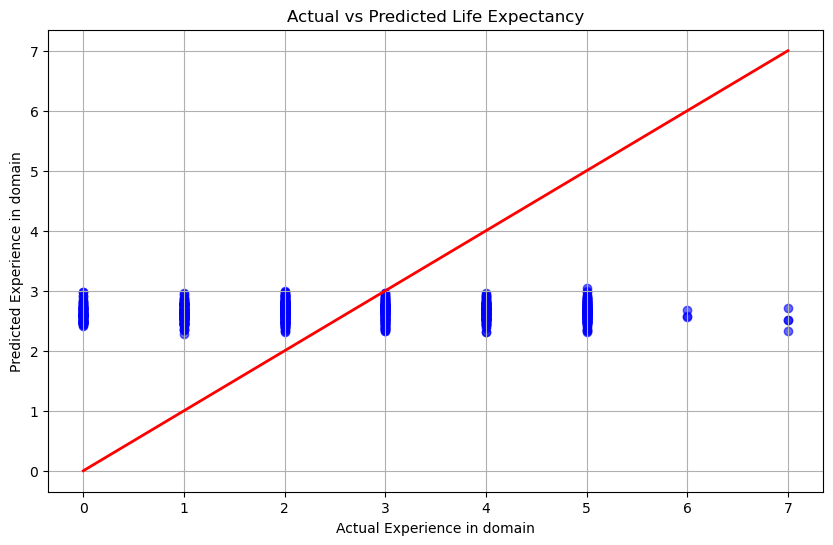

In [107]:
# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  
plt.title('Actual vs Predicted Life Expectancy')
plt.xlabel('Actual Experience in domain')
plt.ylabel('Predicted Experience in domain')
plt.grid(True)
plt.show()